In [2]:
"""
IMPORTS
"""
import numpy as np
import numpy.random as npr
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

# --Get my functions
functions_path = "../../Functions/"
os.chdir(functions_path)
from one_functions_generic import get_trials, performance_metrics, bin_frac, prepro

npr.seed(65)

/opt/anaconda3/envs/iblenv/lib/python3.9/site-packages/one/webclient.py:127: RuntimeWarning: Failed to connect, returning cached response
  warnings.warn('Failed to connect, returning cached response', RuntimeWarning)


In [3]:
"""
Load data
"""
trials_dir = '/home/ines/repositories/representation_learning_variability/DATA/'
trials_dir = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/DATA/'
all_trials = pd.read_csv(trials_dir + "learning_private_one.csv")  

From all data, focus on an example session of an example mouse 
Total of 530 trials should be enough for a sigmoid fit

In [4]:
mouse_example = all_trials.loc[(all_trials['subject_nickname']=='NYU-14') & (all_trials['training_day']==33) ]

In [5]:
mouse_example = prepro(mouse_example)

/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastLeft'] = trials['contrastLeft'].fillna(0)
/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/one_functions_generic.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['contrastRight'] = trials['contrastRight'].fillna(0)
/Users/ineslaranjeira/Documents/Repositories/representation_

In [98]:
def logistic(x):
    # Logistic function (sigmoid)
    y = 1/(np.exp(-x) +1)
    return y

def _sigmoid(x):
    return np.array([_sigmoid_function(value) for value in x])

def _sigmoid_function(x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)
    

def initialize(dim, intercept=False):
    # Initialize theta array and bias 
    #b=random.random()
    #theta=np.random.rand(dim)
    if intercept == True:
        theta = np.random.randn(dim+1, 1) # adds one for the bias
    else:
        theta = np.random.randn(dim, 1)
    return theta


def loglikelihood(y, x, theta):
    ll = np.sum(y * np.log(logistic(x, theta)) + (1-y)* np.log(1-logistic(x, theta)))
    return ll


def gradient(x, y, theta_vector):
    # Computed gradient for Bernoulli distribution
    sigma = logistic(x, theta_vector)
    n = len(y)
    grad = (np.sum(sigma - y) * x )/ n
    grad = x *(sigma - y)
    grad = 2/n * x.T.dot(sigma - y)
    return grad
    
    
def gradient_descent(theta_dim, alpha, x, y, n_iter=50, tolerance=1e-06):
    # the algorithm will simultaneously update the theta values 
    # after each model fits to find the global minimum of our cost function.
    theta_vector = initialize(theta_dim, intercept=False)
    intercept = 0
    y_true = np.reshape(y, (len(y), 1))
    cost_lst = []
    thetas = []
    X_vector = np.c_[np.ones((len(x), 1)), x]  # Add intercept term to x
    X_vector = np.c_[x]  # no intercept term
    for i in range(n_iter):
        x_dot_weights = np.matmul(theta_vector, X_vector.transpose()) + intercept
        # Make predictions based on current thetas
        y_pred = logistic(x_dot_weights)
        #y_pred = _sigmoid(x_dot_weights)
        # Calculate gradient for theta and intercept
        difference = y_pred - y_true
        gradient_w = np.matmul(X_vector.transpose(), difference)
        gradient_w = np.array([np.mean(grad) for grad in gradient_w])
        gradient_b =  np.mean(difference)
        # Calculate loss
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        loss = -np.mean(y_zero_loss + y_one_loss)

        # Update model parameters
        theta_vector = theta_vector - alpha * gradient_w
        intercept = intercept - alpha * gradient_b

        # Append values
        cost_lst.append(loss)
        thetas.append(theta_vector)

        # Decide when to stop and plot progress
        diff = -alpha * gradient_w
        if np.all(np.abs(diff) <= tolerance):
            plt.plot(np.arange(1, n_iter),cost_lst[1:], color = 'red')
            plt.title('Cost function Graph')
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')
            break

    return theta_vector, intercept, cost_lst, thetas

In [87]:
theta_dim = 1
alpha = 0.01
n_iter=10000
tolerance=1e-06

In [110]:
    
    # the algorithm will simultaneously update the theta values 
    # after each model fits to find the global minimum of our cost function.
    theta_vector = initialize(theta_dim, intercept=False)
    intercept = 0
    choice_mapping = {1: 0, -1: 1, 0: -1}
    new_y = [choice_mapping[old_choice] for old_choice in y]
    y_true = np.reshape(new_y, (len(new_y), 1))
    cost_lst = []
    thetas = []
    X_vector = np.c_[np.ones((len(x), 1)), x]  # Add intercept term to x
    X_vector = np.c_[x]  # no intercept term
    for i in range(n_iter):
        x_dot_weights = np.matmul(theta_vector, X_vector.transpose()) + intercept
        # Make predictions based on current thetas
        y_pred = logistic(x_dot_weights)
        #y_pred = _sigmoid(x_dot_weights)
        # Calculate gradient for theta and intercept
        difference = y_pred - y_true
        gradient_w = np.matmul(X_vector.transpose(), difference)
        gradient_w = np.array([np.mean(grad) for grad in gradient_w])
        gradient_b =  np.mean(difference)
        # Calculate loss
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        loss = -np.mean(y_zero_loss + y_one_loss)

        # Update model parameters
        theta_vector = theta_vector - alpha * gradient_w
        intercept = intercept - alpha * gradient_b

        # Append values
        cost_lst.append(loss)
        thetas.append(theta_vector)

        # Decide when to stop and plot progress
        diff = -alpha * gradient_w
        if np.all(np.abs(diff) <= tolerance):
            plt.plot(np.arange(1, n_iter),cost_lst[1:], color = 'red')
            plt.title('Cost function Graph')
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')
            break


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_48722/695982588.py:3: RuntimeWarning: overflow encountered in exp
  y = 1/(np.exp(-x) +1)


In [99]:
x = np.array(mouse_example['signed_contrast'])
y = np.array(mouse_example['choice'])
theta_learned, intercept_learned, cost_lst, thetas = gradient_descent(1, 0.01, x, y, n_iter=10000, tolerance=1e-06)

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_48722/695982588.py:3: RuntimeWarning: overflow encountered in exp
  y = 1/(np.exp(-x) +1)


Text(0, 0.5, 'Cost')

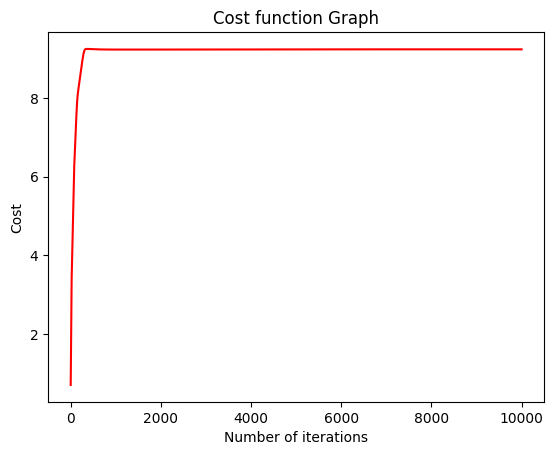

In [100]:
plt.plot(np.arange(1, 10000),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

In [101]:
x_dot_weights = np.matmul(theta_learned, X_vector.transpose()) + intercept_learned
# Make predictions based on current thetas
y_pred = logistic(x_dot_weights)

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_48722/695982588.py:3: RuntimeWarning: overflow encountered in exp
  y = 1/(np.exp(-x) +1)


In [107]:
choice_pred = [1 if p > 0.5 else 0 for p in y_pred[0]]

In [108]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, choice_pred)

In [109]:
accuracy

0.2188679245283019